<a href="https://colab.research.google.com/github/huseyincavusbi/ChestResNet/blob/main/ChestResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import shutil
import kagglehub
import os

# --- Data Download and Setup ---
# Download the dataset from Kaggle
try:
    dataset_path = kagglehub.dataset_download("pranavraikokte/covid19-image-dataset")
    print("Dataset downloaded successfully.")
except Exception as e:
    print(f"Error downloading dataset: {e}")
    dataset_path = None

# Define the destination directory for the dataset
dataset_destination = "/content/Dataset"

# Move the dataset to the destination directory
if dataset_path:
    try:
        shutil.move(dataset_path, dataset_destination)
        print(f"Dataset moved to: {dataset_destination}")
    except Exception as e:
        print(f"Error moving dataset: {e}")

# --- Model Download and Setup ---
# Download the model from Kaggle
try:
    model_path = kagglehub.model_download("tensorflow/resnet-50/tensorFlow2/classification")
    print("Model downloaded successfully.")
except Exception as e:
    print(f"Error downloading model: {e}")
    model_path = None

# Define the destination directory for the model
model_destination = "/content/Model"

# Move the model to the destination directory
if model_path:
    try:
        shutil.move(model_path, model_destination)
        print(f"Model moved to: {model_destination}")
    except Exception as e:
        print(f"Error moving model: {e}")

100%|██████████| 158M/158M [00:04<00:00, 35.6MB/s]

Extracting files...


Dataset downloaded successfully.
Dataset moved to: /content/Dataset



  0%|          | 0.00/4.72M [00:00<?, ?B/s]
100%|██████████| 4.72M/4.72M [00:00<00:00, 17.0MB/s]



100%|██████████| 16.8k/16.8k [00:00<00:00, 27.0MB/s]



  0%|          | 0.00/97.8M [00:00<?, ?B/s]
  1%|          | 1.00M/97.8M [00:00<00:55, 1.82MB/s]
  2%|▏         | 2.00M/97.8M [00:00<00:28, 3.49MB/s]
  5%|▌         | 5.00M/97.8M [00:00<00:10, 8.97MB/s]
  9%|▉         | 9.00M/97.8M [00:00<00:05, 16.1MB/s]
 13%|█▎        | 13.0M/97.8M [00:01<00:04, 22.0MB/s]
 17%|█▋        | 17.0M/97.8M [00:01<00:03, 26.6MB/s]
 21%|██▏       | 21.0M/97.8M [00:01<00:02, 30.6MB/s]
 26%|██▌       | 25.0M/97.8M [00:01<00:02, 33.1MB/s]
 30%|██▉       | 29.0M/97.8M [00:01<00:02, 29.9MB/s]
 34%|███▎      | 33.0M/97.8M [00:01<00:02, 32.9MB/s]
 38%|███▊      | 37.0M/97.8M [00:01<00:01, 35.2MB/s]
 42%|████▏     | 41.0M/97.8M [00:01<00:01, 37.0MB/s]
 46%|████▌     | 45.0M/97.8M [00:01<00:01, 35.2MB/s]
 50%|█████     | 49.0M/97.8M [00:02<00:01, 36.9MB/s]
 54%|█████▍    | 53.0M/97.8M [00:02<00:01, 38.2MB/s]
 58%|█████▊    | 57.0M/97.8M [00:02<00:01, 39.0MB/s]
 62%|██████▏   | 61.0M/97.8M [00:02<00:00, 39.5MB/s]
 66%|██████▋   | 65.0M/97.8M [00:02<00:00, 39.5MB/s]


Model downloaded successfully.
Model moved to: /content/Model


Dataset structure:
Directory: /content/Dataset/Covid19-dataset/test
Directory: /content/Dataset/Covid19-dataset/train
Directory: /content/Dataset/Covid19-dataset/test/Normal
Directory: /content/Dataset/Covid19-dataset/test/Covid
Directory: /content/Dataset/Covid19-dataset/test/Viral Pneumonia
Directory: /content/Dataset/Covid19-dataset/train/Normal
Directory: /content/Dataset/Covid19-dataset/train/Covid
Directory: /content/Dataset/Covid19-dataset/train/Viral Pneumonia

train folders:
- Normal: 70 images
- Covid: 46 images
- Viral Pneumonia: 70 images

test folders:
- Normal: 20 images
- Covid: 12 images
- Viral Pneumonia: 20 images


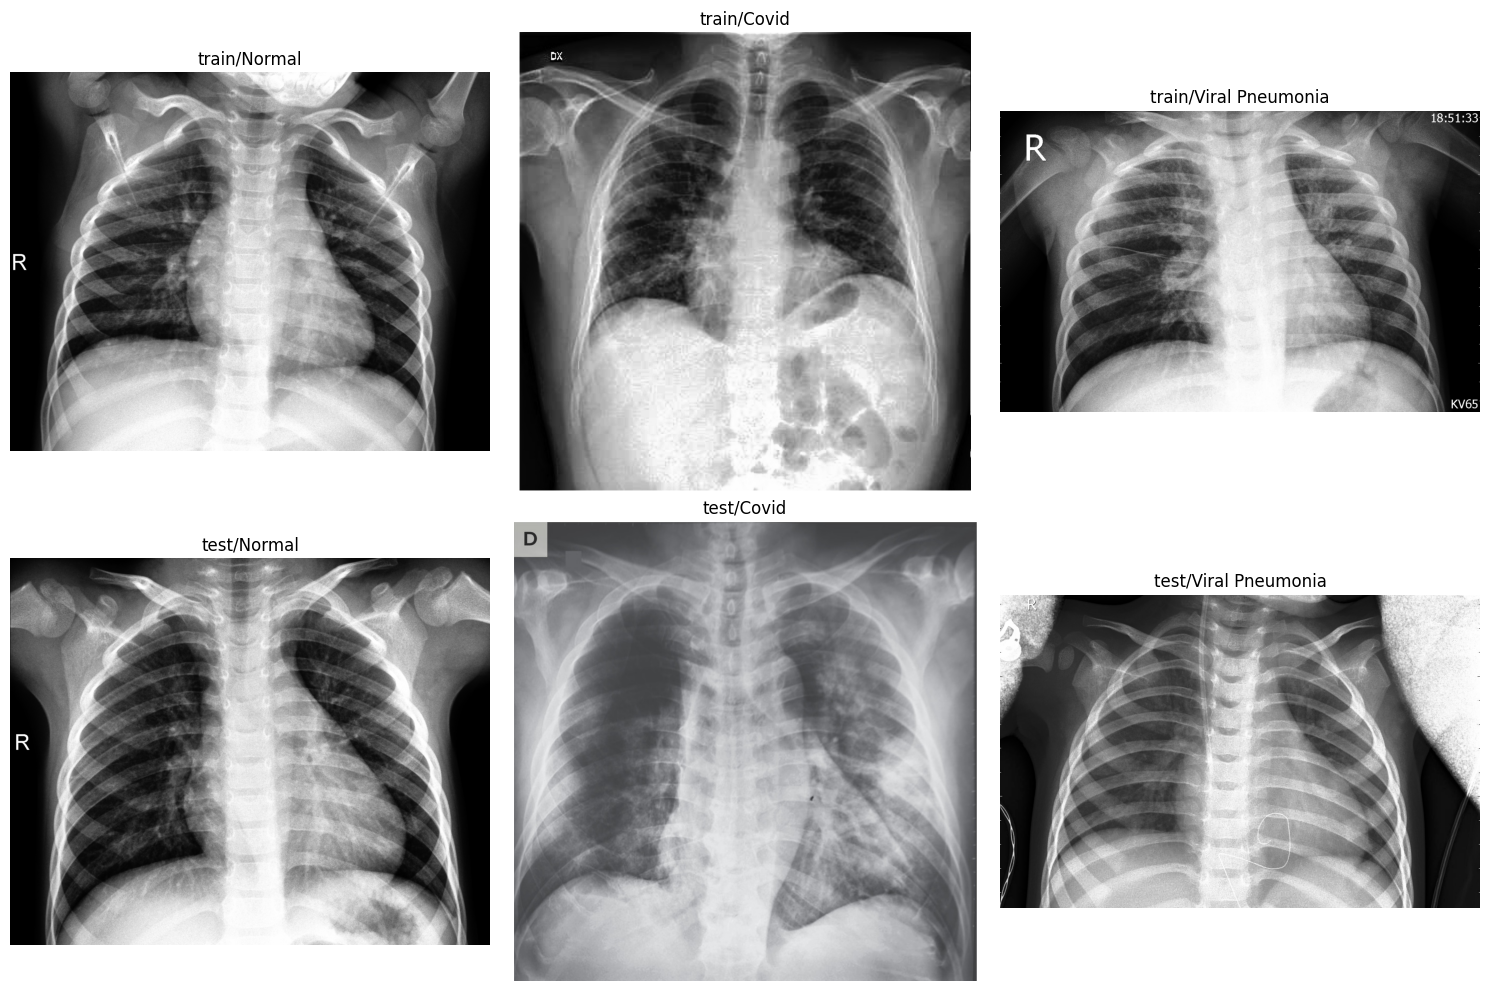

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random

def show_dataset_samples(base_path):
    """
    Visualizes random samples from the dataset.

    Args:
        base_path (str): The base path where the dataset is located.
    """
    dataset_base_path = Path(base_path)
    data_splits = ['train', 'test']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for row, split in enumerate(data_splits):
        current_split_path = dataset_base_path / split
        print(f"\n{split} folders:")

        # Get a list of all subfolders (categories) within the current split
        category_folders = [f for f in current_split_path.iterdir() if f.is_dir()]

        for col, category_folder in enumerate(category_folders):
            # Check only for .jpeg files
            image_paths = list(category_folder.glob('*.jpeg'))
            print(f"- {category_folder.name}: {len(image_paths)} images")

            try:
                if image_paths:
                    # Choose a random image and display it
                    sample_image_path = random.choice(image_paths)
                    image = Image.open(sample_image_path)
                    axes[row][col].imshow(image, cmap='gray')
                    axes[row][col].set_title(f"{split}/{category_folder.name}")
                else:
                    axes[row][col].text(0.5, 0.5, 'No images', ha='center', va='center')
            except Exception as e:
                print(f"Error processing {category_folder}: {e}")
                axes[row][col].text(0.5, 0.5, 'Error', ha='center', va='center')

            axes[row][col].axis('off')

    plt.tight_layout()
    plt.show()

# Dataset path
dataset_path = '/content/Dataset/Covid19-dataset'

# Check dataset structure
print("Dataset structure:")
for item in Path(dataset_path).rglob("*"):
    if item.is_dir():
        print(f"Directory: {item}")

# Run visualization
show_dataset_samples(dataset_path)

In [3]:
import tensorflow as tf

# Load the saved model
model_directory = '/content/Model'
try:
    loaded_model = tf.saved_model.load(model_directory)
    print("Model loaded successfully")

    # Get and display model signatures
    print("\nModel signatures:", loaded_model.signatures.keys())

    # Get default serving signature and display input/output tensors
    serving_function = loaded_model.signatures['serving_default']
    print("\nModel input tensors:", serving_function.structured_input_signature)
    print("Model output tensors:", serving_function.structured_outputs)

    # Display model structure
    print("\nModel structure:")
    print(loaded_model)

except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully

Model signatures: KeysView(_SignatureMap({'serving_default': <ConcreteFunction (*, input_1: TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1')) -> Dict[['activation_49', TensorSpec(shape=(None, 1001), dtype=tf.float32, name='activation_49')]] at 0x7F183051E790>}))

Model input tensors: ((), {'input_1': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1')})
Model output tensors: {'activation_49': TensorSpec(shape=(None, 1001), dtype=tf.float32, name='activation_49')}

Model structure:
<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f17cc1f1010>


In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path):
    """
    Preprocesses an image for model prediction.

    Loads an image, resizes it to 224x224, and applies
    ResNet50 specific preprocessing.

    Args:
        image_path (str): Path to the image file.

    Returns:
        np.ndarray: Processed image as a NumPy array.
    """
    # Load image and resize to 224x224
    img = load_img(image_path, target_size=(224, 224))

    # Convert image to array and add an extra dimension
    img_array = img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)

    # Preprocess the image using ResNet50's method (e.g., scaling)
    processed_image = tf.keras.applications.resnet50.preprocess_input(img_batch)

    return processed_image

In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from tensorflow.keras.callbacks import ModelCheckpoint

# --- Constants ---
DATA_PATH = '/content/Dataset/Covid19-dataset'
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'test')
CLASS_NAMES = ['Covid', 'Normal', 'Viral Pneumonia']
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
WEIGHTS_DIR = 'weights'
WEIGHTS_PATH = os.path.join(WEIGHTS_DIR, 'covid_classifier.weights.h5')

# --- Data Generators ---
# Create ImageDataGenerator for training data with validation split
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2
)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Create validation data generator
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# --- Model Setup ---
# Load ResNet50 with pre-trained weights, exclude top layer
base_model = ResNet50(
    weights='imagenet',
    include_top=False, # Exclude the final fully connected layer (classification layer)
    input_shape=(*IMG_SIZE, 3), # Define input shape: 224x224 pixels with 3 color channels (grayscale images will be replicated to 3 channels for compatibility with ResNet50).
    pooling='avg' # Use average pooling to reduce the spatial dimensions
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Model Training ---
# Ensure the directory exists
os.makedirs(WEIGHTS_DIR, exist_ok=True)

# Define ModelCheckpoint callback to save best weights
checkpoint = ModelCheckpoint(
    filepath=WEIGHTS_PATH,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the model and save weights
try:
    history = model.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
        callbacks=[checkpoint]
    )
    print(f"Successfully saved weights to {WEIGHTS_PATH}")
except Exception as e:
    print(f"Error during training: {e}")

# --- Model Evaluation ---
# Load weights for testing
if os.path.exists(WEIGHTS_PATH):
    try:
        model.load_weights(WEIGHTS_PATH)
        print(f"Successfully loaded weights from {WEIGHTS_PATH}")
    except Exception as e:
        print(f"Error loading weights: {e}")
        print("Using last training state")
else:
    print(f"No weights found at {WEIGHTS_PATH}, using last training state")

# Test data generator
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict on the test set
predictions = model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# --- Confusion Matrix and Classification Report ---
# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate and print classification report
class_report = classification_report(y_true, y_pred, target_names=CLASS_NAMES)
print("\nClassification Report:")
print(class_report)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.4397 - loss: 1.2360
Epoch 1: val_accuracy improved from -inf to 0.52000, saving model to weights/covid_classifier.weights.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4333 - loss: 1.2449 - val_accuracy: 0.5200 - val_loss: 0.9651
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5264 - loss: 1.0248
Epoch 2: val_accuracy improved from 0.52000 to 0.74000, saving model to weights/covid_classifier.weights.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 450ms/step - accuracy: 0.5328 - loss: 1.0164 - val_accuracy: 0.7400 - val_loss: 0.7448
Epoch 3/100
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7004 - loss: 0.8167
Epoch 3: val_accuracy improved from 0.74000 to 0.76000, saving model to weights/covid_classifier.weights.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 522ms/step - accuracy: 0.7019 - loss: 0.8149 - val_accuracy: 0.7600 - val_loss: 0.7275
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7028 - loss: 0.7544
Epoch 4: v

Found 66 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step

Confusion Matrix:
[[26  0  0]
 [ 0 13  7]
 [ 0  0 20]]

Classification Report:
                 precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       1.00      0.65      0.79        20
Viral Pneumonia       0.74      1.00      0.85        20

       accuracy                           0.89        66
      macro avg       0.91      0.88      0.88        66
   weighted avg       0.92      0.89      0.89        66



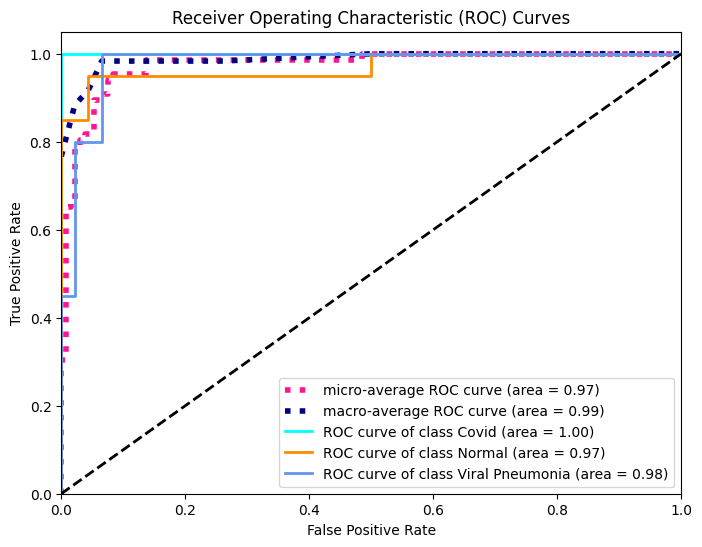


Misclassified Images:


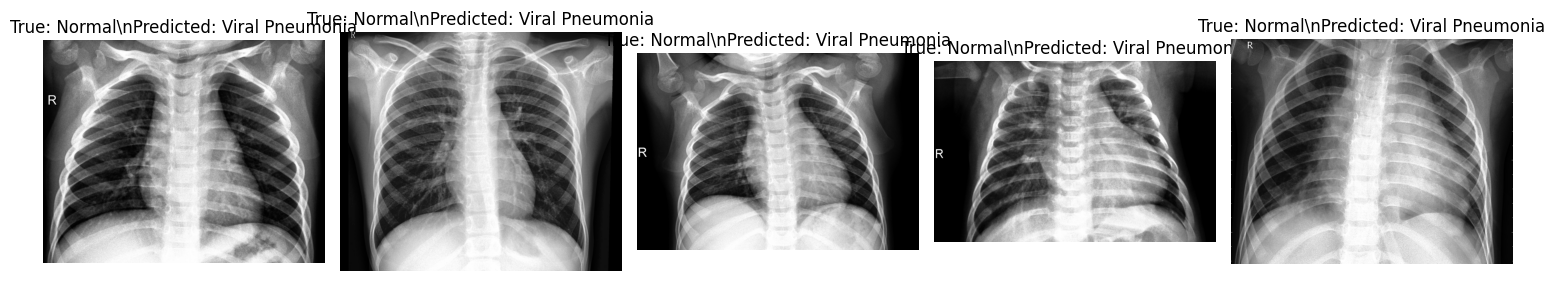

In [6]:
# --- Test Data Generator Setup ---
# Create a new ImageDataGenerator for testing, applying preprocessing and ensuring consistent input format with the training data, while also not shuffling the data for proper label alignment during evaluation.
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# --- Prediction ---
# Reset the generator before making predictions
test_generator.reset()

# Predict on the test set
predictions = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE + 1, verbose=1)
y_pred_prob = predictions  # Use predictions directly as probabilities

# True labels from the generator
y_true = test_generator.classes

# --- Confusion Matrix ---
# Generate confusion matrix
y_pred = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# --- Classification Report ---
# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=CLASS_NAMES)
print("\nClassification Report:")
print(class_report)

# --- ROC Curve ---
# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
n_classes = len(CLASS_NAMES)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})',
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {CLASS_NAMES[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# --- Misclassification Visualization ---
# Get the list of image file paths
image_files = []
for category in CLASS_NAMES:
    category_path = Path(TEST_PATH) / category
    image_files.extend(list(category_path.glob('*.jpeg')) + list(category_path.glob('*.png')))

# Find indices of misclassified images
misclassified_indices = np.where(np.array(y_true) != np.array(y_pred))[0]

# Display up to 5 misclassified images
if misclassified_indices.size > 0:
    plt.figure(figsize=(15, 5))
    print("\nMisclassified Images:")
    for i, idx in enumerate(misclassified_indices[:min(5, len(misclassified_indices))]):
        image_path = image_files[idx]
        img = Image.open(image_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {CLASS_NAMES[y_true[idx]]}\\nPredicted: {CLASS_NAMES[y_pred[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassifications found.")